# **Multilayer Perceptron (MLP) usando Sklearn**
## **Alumno**: Renzo Alessandro Sucari Velásquez

###**Dataset**: Enfermedad del Corazón, disponible en [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)
#### **Sus atributos son**:
* **Age**: Edad del paciente
* **Sex**: Sexo del paciente
* **cp**: Tipo de dolor de pecho (4 valores)
* **trestbps**: Presión arterial en reposo (en mm Hg)
* **chol**: Colesterol sérico
* **fbs**: Azúcar en sangre en ayunas (1 = verdadero; 0 = falso)
* **restecg**: Resultados electrocardiográficos en reposo
* **thalach**: Frecuencia cardíaca máxima alcanzada
* **exang**: Angina inducida por ejercicio
* **oldpeak**: Depresión del ST inducida por el ejercicio en relación con el reposo
* **slope**: La pendiente del segmento ST de ejercicio pico
* **ca**: Número de vasos principales (0-3) coloreados por fluoroscopia
* **thal**: 3 = normal; 6 = defecto fijo; 7 = defecto reversible
* **target**: Con presencia o sin presencia de la enfermedad cardiaca en el paciente.


###**Objetivo**:
El objetivo aquí era predecir la presencia de la enfermedad cardiaca en el paciente en función a su edad, sexo, tipo de dolor en el pecho, presión arterial en reposo, colestorol, azúcar en sangre, etc. Primero usé pandas para leer en el archivo csv y lo guardé como la variable df como un marco de datos. A continuación, creé un nuevo marco de datos llamado X que contenía solo las columnas que necesitaba usar.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Lectura de la Data

In [2]:
# Para otra dataset: Calidad del Vino
#names = ["class", "Alocohol", "Malic Acid", "Ash", "Alkalinity of ash","Magnesium", "Total phenols", "Flavanoids", "Non Flavanoids Phenols", "Proanthocyanins", "Color Intensity", "Hue" , "OD280/OD315 of diluted wines","Proline"]
#df = pd.read_csv("wine.data", names=names)
#df.head()

In [3]:
# para la dataser: Enfermedad del corazón
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Generamos estadísticas descriptivas

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Visualización de los datos - Heatmap

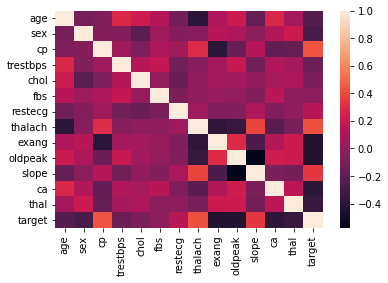

In [5]:
sns.heatmap(df.corr())

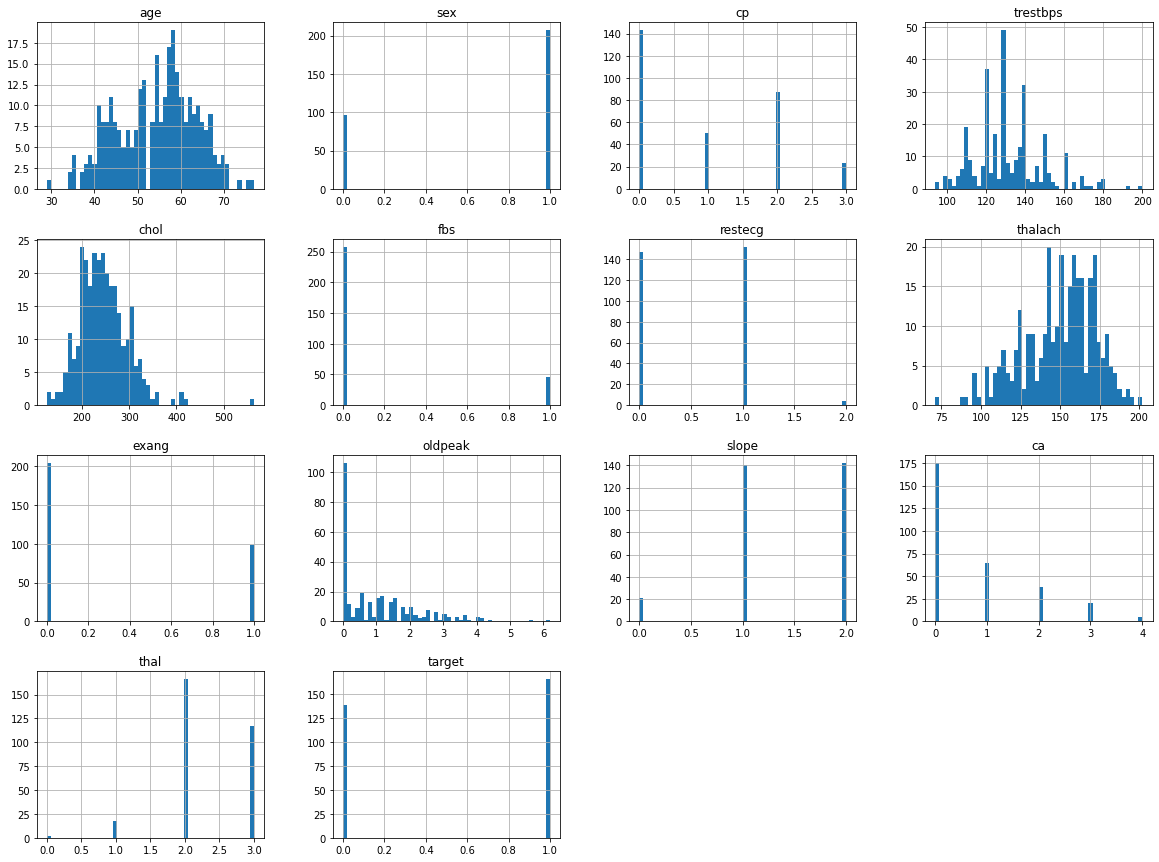

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Split de los Datos

In [7]:
# Para otra dataset: Calidad del Vino
#y = df.pop('class')

In [8]:
y = df.pop('target')

In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [10]:
X = df

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [14]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Multi-layer Perceptron classifier 
## Training

In [16]:
# MlP Training
# activation: Función de activación para la capa oculta. {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
# alpha: Parámetro de penalización L2 (término de regularización)
# solver: El solucionador para la optimización del peso. {‘lbfgs’, ‘sgd’, ‘adam’}
# hidden_layer_sizes: El i-ésimo elemento representa el número de neuronas en la i-ésima capa oculta.

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='logistic', alpha=1e-5,  solver = 'lbfgs', hidden_layer_sizes=(30,30,35))

In [17]:
mlp

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 35), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
mlp.fit(X_train,  y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 35), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Test

In [19]:
predictions = mlp.predict(X_test)

In [20]:
predictions

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0])

# Análisis

In [21]:
print("Puntuación del conjunto de Training: %f" % mlp.score(X_train, y_train))
print("Puntuación del conjunto de Test: %f" % mlp.score(X_test, y_test))

Puntuación del conjunto de Training: 1.000000
Puntuación del conjunto de Test: 0.870968


In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[14  3]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.81      0.93      0.87        14

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31

0.8709677419354839


# Resumen

Mi conclusión de todo esto se pudo clasificar 31 casos cada uno con sus atributos (Xs) obteniendo un Y de clasificación al 87% de precisión.